In [23]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.interpolate import griddata

In [24]:
rotate_durations = [2, 5, 10, 20]
fpss = [1,2,3,4,5]

In [25]:
results = []
json_file = 'rotate_duration_fps_results/result.json'
with open(json_file, "r") as file:
    results = json.load(file)



In [26]:
sorted(results, key = lambda x : x[3])

[[20, 1, "U'", 0.004478414841324637],
 [5, 2, 'U', 0.005316371207145097],
 [10, 4, 'U', 0.005378577670324069],
 [20, 4, 'U', 0.005401518618454105],
 [5, 3, 'U', 0.005618078711017235],
 [20, 3, "F'", 0.005677181181376527],
 [10, 3, 'U', 0.005995394292679781],
 [20, 4, "F'", 0.006288556284723713],
 [10, 5, 'U', 0.006349365992393529],
 [20, 5, 'U', 0.0064207569470323385],
 [20, 3, 'U', 0.006541478549557381],
 [5, 4, 'U', 0.00654921456564896],
 [5, 5, 'U', 0.007098714036324187],
 [20, 2, 'U', 0.007718514812841869],
 [5, 5, "U'", 0.007993699196083247],
 [10, 2, 'U', 0.00874750048507289],
 [20, 2, "F'", 0.009604641477088064],
 [5, 4, "U'", 0.010177232173620312],
 [10, 2, 'F', 0.01054311591359295],
 [10, 4, 'F', 0.011382221776173039],
 [20, 5, "F'", 0.011476562493182473],
 [5, 2, "U'", 0.011572645183547618],
 [10, 3, "F'", 0.011768797269220612],
 [10, 5, 'F', 0.011854010670703508],
 [5, 1, 'F', 0.012143618105427125],
 [10, 3, 'F', 0.012301168196428878],
 [10, 3, "U'", 0.012484288489588078],
 

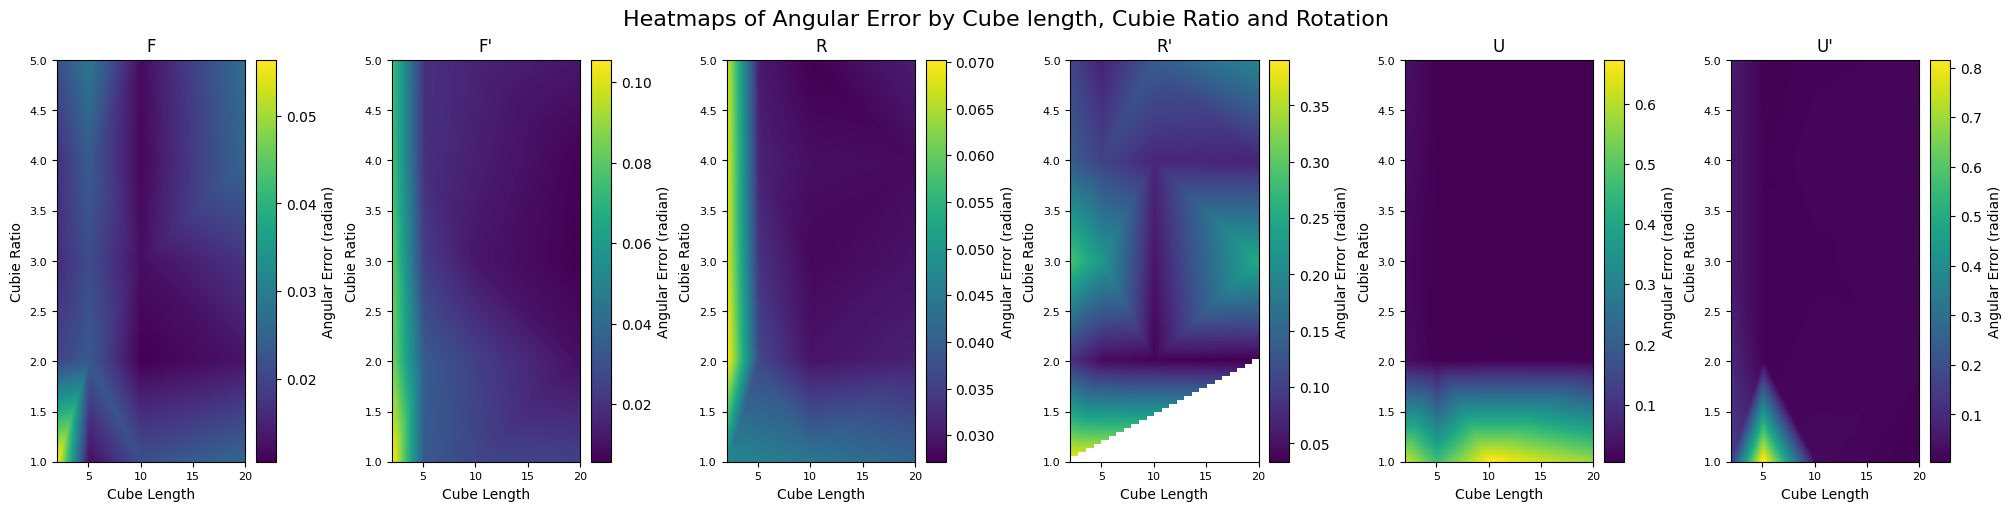

In [27]:
# Data (Replace `results` with your actual data)
data = results

# Extract components
rotate_duration = np.array([entry[0] for entry in data])
fps = np.array([entry[1] for entry in data])
rotations = np.array([entry[2] for entry in data])
error = np.array([entry[3] for entry in data])

# Unique rotations
unique_rotations = np.unique(rotations)

# Set up the grid for heatmaps
rotate_duration_grid = np.linspace(min(rotate_duration), max(rotate_duration), 100)
fps_grid = np.linspace(min(fps), max(fps), 100)
grid_x, grid_y = np.meshgrid(rotate_duration_grid, fps_grid)

# Create heatmaps for each rotation
fig, axes = plt.subplots(1, len(unique_rotations), figsize=(20, 5), constrained_layout=True)
for i, rotation in enumerate(unique_rotations):
    # Mask data for the current rotation
    mask = rotations == rotation
    grid_z = griddata(
        (rotate_duration[mask], fps[mask]), error[mask],
        (grid_x, grid_y), method='linear'
    )

    # Plot heatmap
    ax = axes[i]
    heatmap = ax.imshow(
        grid_z,
        extent=[
            min(rotate_duration), max(rotate_duration),
            min(fps), max(fps)
        ],
        origin='lower',
        aspect='auto',
        cmap='viridis'
    )

    # Titles and labels
    ax.set_title(f'{rotation}', fontsize=12)
    ax.set_xlabel('Cube Length', fontsize=10)
    ax.set_ylabel('Cubie Ratio', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)

    # Add color bar
    cbar = plt.colorbar(heatmap, ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label('Angular Error (radian)', fontsize=10)

# Overall plot title
fig.suptitle('Heatmaps of Angular Error by Cube length, Cubie Ratio and Rotation', fontsize=16)
# plt.savefig('error_heatmaps.png', dpi=300)
plt.show()


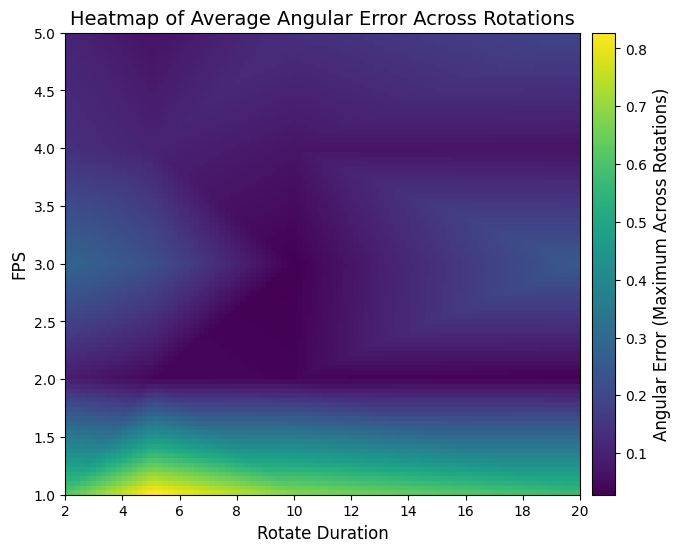

In [28]:
# Data (Replace `results` with your actual data)
data = results

# Extract components
rotate_duration = np.array([entry[0] for entry in data])
fps = np.array([entry[1] for entry in data])
rotations = np.array([entry[2] for entry in data])
error = np.array([entry[3] for entry in data])

# Aggregate maximum error for each (friction, spacing)
# Group errors by unique (friction, spacing) pairs
unique_pairs = list(set(zip(rotate_duration, fps)))
max_error_per_pair = {
    pair: max(error[(rotate_duration == pair[0]) & (fps == pair[1])])
    for pair in unique_pairs
}

# Prepare data for interpolation
rotate_duration_unique = np.array([pair[0] for pair in unique_pairs])
fps_unique = np.array([pair[1] for pair in unique_pairs])
error_max = np.array([max_error_per_pair[pair] for pair in unique_pairs])

# Set up the grid for heatmap
rotate_duration_grid = np.linspace(min(rotate_duration), max(rotate_duration), 100)
fps_grid = np.linspace(min(fps), max(fps), 100)
grid_x, grid_y = np.meshgrid(rotate_duration_grid, fps_grid)

# Interpolate the maximum error for the grid
grid_z = griddata(
    (rotate_duration_unique, fps_unique), error_max,
    (grid_x, grid_y), method='linear'
)

# Create the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(
    grid_z,
    extent=[
        min(rotate_duration), max(rotate_duration),
        min(fps), max(fps)
    ],
    origin='lower',
    aspect='auto',
    cmap='viridis'
)

# Add title and axis labels
ax.set_title('Heatmap of Average Angular Error Across Rotations', fontsize=14)
ax.set_xlabel('Rotate Duration', fontsize=12)
ax.set_ylabel('FPS', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Angular Error (Maximum Across Rotations)', fontsize=12)

# Save the figure
# plt.savefig('maximum_error_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
def avg(x) : return sum(x) / len(x)

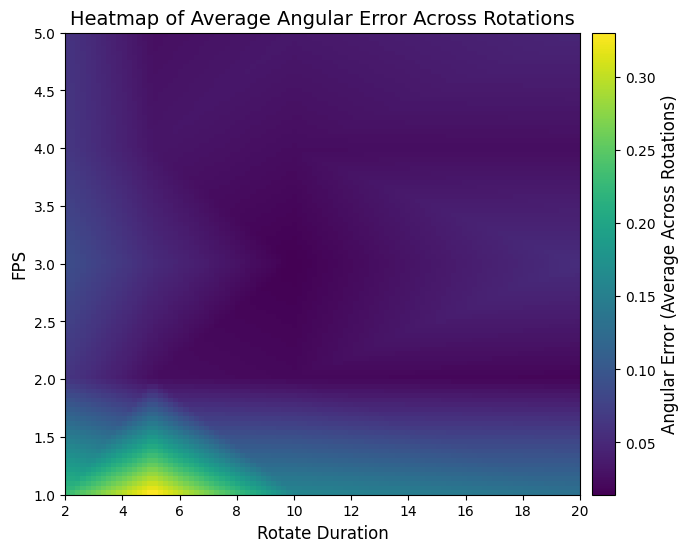

In [30]:
# Data (Replace `results` with your actual data)
data = results

# Extract components
rotate_duration = np.array([entry[0] for entry in data])
fps = np.array([entry[1] for entry in data])
rotations = np.array([entry[2] for entry in data])
error = np.array([entry[3] for entry in data])

# Aggregate maximum error for each (friction, spacing)
# Group errors by unique (friction, spacing) pairs
unique_pairs = list(set(zip(rotate_duration, fps)))
max_error_per_pair = {
    pair: avg(error[(rotate_duration == pair[0]) & (fps == pair[1])])
    for pair in unique_pairs
}

# Prepare data for interpolation
rotate_duration_unique = np.array([pair[0] for pair in unique_pairs])
fps_unique = np.array([pair[1] for pair in unique_pairs])
error_max = np.array([max_error_per_pair[pair] for pair in unique_pairs])

# Set up the grid for heatmap
rotate_duration_grid = np.linspace(min(rotate_duration), max(rotate_duration), 100)
fps_grid = np.linspace(min(fps), max(fps), 100)
grid_x, grid_y = np.meshgrid(rotate_duration_grid, fps_grid)

# Interpolate the maximum error for the grid
grid_z = griddata(
    (rotate_duration_unique, fps_unique), error_max,
    (grid_x, grid_y), method='linear'
)

# Create the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(
    grid_z,
    extent=[
        min(rotate_duration), max(rotate_duration),
        min(fps), max(fps)
    ],
    origin='lower',
    aspect='auto',
    cmap='viridis'
)

# Add title and axis labels
ax.set_title('Heatmap of Average Angular Error Across Rotations', fontsize=14)
ax.set_xlabel('Rotate Duration', fontsize=12)
ax.set_ylabel('FPS', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Angular Error (Average Across Rotations)', fontsize=12)

# Save the figure
# plt.savefig('maximum_error_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()